###Data Visualized for emails spam or not using (emails.csv)
<br><br>


Dataset Sample:
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

Label Counts:
spam
0    4360
1    1368
Name: count, dtype: int64


<ipython-input-6-933ac6018a17>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spam', data=df, palette='Set1')   #seaborn ရေးနည်း
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


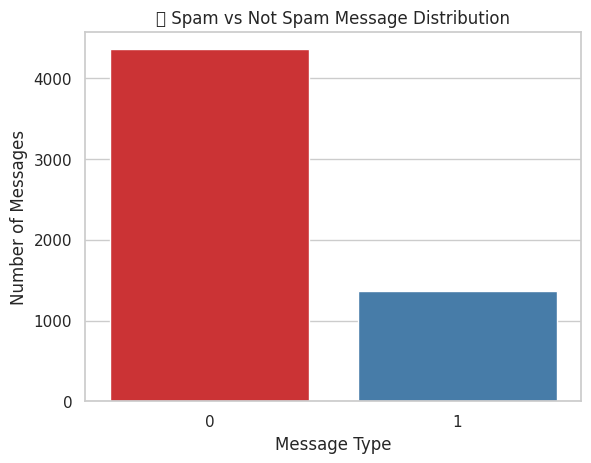

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Test_NV/emails.csv", encoding='latin-1')

# Step 2: Clean up unnecessary columns
df = df.rename(columns={'v1': 'text', 'v2': 'spam'})
df = df[['text', 'spam']]  # Keep only relevant columns

# Step 3: Show basic info
print("Dataset Sample:")
print(df.head())

# Step 4: Count of each label
label_counts = df['spam'].value_counts()
print("\nLabel Counts:")
print(label_counts)

# Step 5: Plot the distribution
sns.set(style="whitegrid")
sns.countplot(x='spam', data=df, palette='Set1')   #seaborn ရေးနည်း

plt.title("📊 Spam vs Not Spam Message Distribution")
plt.xlabel("Message Type")
plt.ylabel("Number of Messages")
plt.show()


<br><br>
Bernoulli Naive Bayes Accuracy test
<br><br>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Load your dataset
# Assume 'emails.csv' with columns 'text' (email content) and 'label' (spam=1, ham=0)
df = pd.read_csv("/content/drive/MyDrive/Test_NV/emails.csv")

# 2. Split data into features and target
X = df['text']
y = df['spam']

# 3. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Convert text data to binary features using CountVectorizer (presence/absence)
vectorizer = CountVectorizer(binary=True)  # binary=True for BernoulliNB

# Fit on train and transform both train and test
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# 5. Create and train BernoulliNB classifier
clf = BernoulliNB()
clf.fit(X_train_vect, y_train)

# 6. Predict on test set
y_pred = clf.predict(X_test_vect)

# 7. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9825479930191972

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       0.99      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146



<br><br>
Multinomial Naive Bayes Accuracy test
<br><br>


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Load your dataset
# Assume 'emails.csv' with columns 'text' (email content) and 'label' (spam=1, ham=0)
df = pd.read_csv('/content/drive/MyDrive/Test_NV/emails.csv')

# 2. Split data into features and target
X = df['text']
y = df['spam']

# 3. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Convert text data to binary features using CountVectorizer (presence/absence)
vectorizer = CountVectorizer(binary=True)  # binary=True for BernoulliNB

# Fit on train and transform both train and test
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# 5. Create and train BernoulliNB classifier
clf = MultinomialNB()
clf.fit(X_train_vect, y_train)

# 6. Predict on test set
y_pred = clf.predict(X_test_vect)

# 7. Evaluate performance
print("Accuracy for MultinomialNB:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy for MultinomialNB: 0.981675392670157

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       0.99      0.93      0.96       290

    accuracy                           0.98      1146
   macro avg       0.99      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146



<br><br>
User input spam or not using (emails.csv)
<br><br>

In [9]:
# 6. User input prediction loop
while True:
    user_email = input("\nEnter email text to classify (or 'quit' to exit): ")
    if user_email.lower() == 'quit':
        break
    user_vect = vectorizer.transform([user_email])
    prediction = clf.predict(user_vect)[0]
    label = "SPAM" if prediction == 1 else "NOT SPAM"

    print("Prediction:", label)


Enter email text to classify (or 'quit' to exit): lottery
Prediction: SPAM

Enter email text to classify (or 'quit' to exit): quit


<br><br><br>
###Data Visualized for emails spam or not using (spam_Emails_data.csv)
<br><br>


Dataset Sample:
  label                                               text
0  Spam  viiiiiiagraaaa\nonly for the ones that want to...
1   Ham  got ice thought look az original message ice o...
2  Spam  yo ur wom an ne eds an escapenumber in ch ma n...
3  Spam  start increasing your odds of success & live s...
4   Ham  author jra date escapenumber escapenumber esca...

Label Counts:
label
Ham     102160
Spam     91692
Name: count, dtype: int64


<ipython-input-3-c8fd07a0ab8c>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set1')   #seaborn ရေးနည်း
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


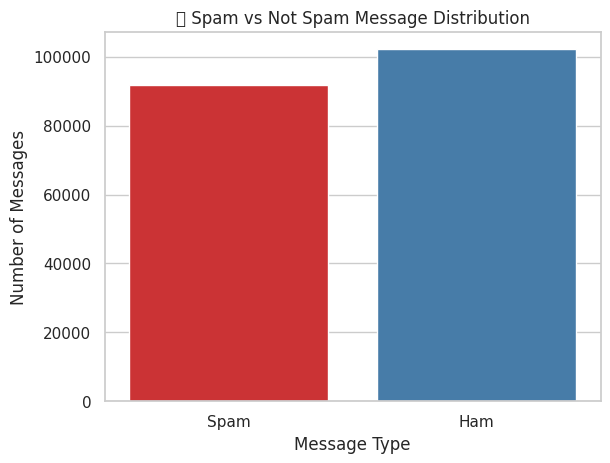

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Test_NV/spam_Emails_data.csv", encoding='latin-1')

# Step 2: Clean up unnecessary columns
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df = df[['label', 'text']]  # Keep only relevant columns

# Step 3: Show basic info
print("Dataset Sample:")
print(df.head())

# Step 4: Count of each label
label_counts = df['label'].value_counts()
print("\nLabel Counts:")
print(label_counts)

# Step 5: Plot the distribution
sns.set(style="whitegrid")
sns.countplot(x='label', data=df, palette='Set1')   #seaborn ရေးနည်း

plt.title("📊 Spam vs Not Spam Message Distribution")
plt.xlabel("Message Type")
plt.ylabel("Number of Messages")
plt.show()

<br><br>
train test split uisng spam_Emails_data
<br><br>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Test_NV/spam_Emails_data.csv", encoding='latin-1')

# Rename and keep only the relevant columns
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df = df[['label', 'text']].dropna()

# Fix label formatting: lower case + map to numbers
df['label'] = df['label'].str.lower()
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df = df.dropna(subset=['label'])  # drop rows that couldn't be mapped
df['label'] = df['label'].astype(int)

# Split features and labels
X = df['text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = CountVectorizer(binary=True)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train Bernoulli Naive Bayes
clf = BernoulliNB()
clf.fit(X_train_vect, y_train)

# Evaluate
y_pred = clf.predict(X_test_vect)
print("Accuracy using BernoulliNB:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8811968016507609

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88     20317
           1       0.82      0.96      0.88     18453

    accuracy                           0.88     38770
   macro avg       0.89      0.88      0.88     38770
weighted avg       0.89      0.88      0.88     38770



<br><br>
train test split uisng spam_Emails_data using MultinomialNB
<br><br>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Test_NV/spam_Emails_data.csv", encoding='latin-1')

# Rename and keep only the relevant columns
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df = df[['label', 'text']].dropna()

# Fix label formatting: lower case + map to numbers
df['label'] = df['label'].str.lower()
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df = df.dropna(subset=['label'])  # drop rows that couldn't be mapped
df['label'] = df['label'].astype(int)

# Split features and labels
X = df['text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = CountVectorizer(binary=True)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train Bernoulli Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_vect, y_train)

# Evaluate
y_pred = clf.predict(X_test_vect)
print("Accuracy for MultinomialNB:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy for MultinomialNB: 0.9660562290430745

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     20317
           1       0.98      0.94      0.96     18453

    accuracy                           0.97     38770
   macro avg       0.97      0.97      0.97     38770
weighted avg       0.97      0.97      0.97     38770



user input spam or not using (spam_Emails_data.csv)

In [10]:
# --- User input classification ---
while True:
    user_input = input("\nEnter a message to classify as spam or ham (or type 'exit' to quit):\n")
    if user_input.lower() == 'exit':
        break
    input_vect = vectorizer.transform([user_input])
    prediction = clf.predict(input_vect)[0]
    print("🔍 Prediction:", "📩 Spam" if prediction == 1 else "✉️ Ham")


Enter a message to classify as spam or ham (or type 'exit' to quit):
lottery
🔍 Prediction: 📩 Spam

Enter a message to classify as spam or ham (or type 'exit' to quit):
hi
🔍 Prediction: ✉️ Ham

Enter a message to classify as spam or ham (or type 'exit' to quit):
exit
